Accuracy Score - KMeans: 83.6555360281195
Accuracy Score - DBSCAN: 0.0
Accuracy Score - Hierarchical Clustering: 32.161687170474515


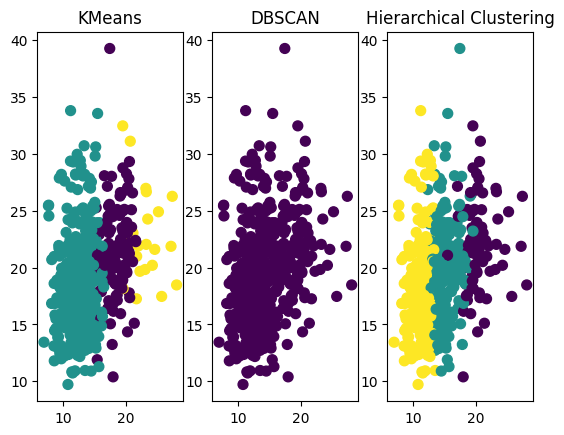

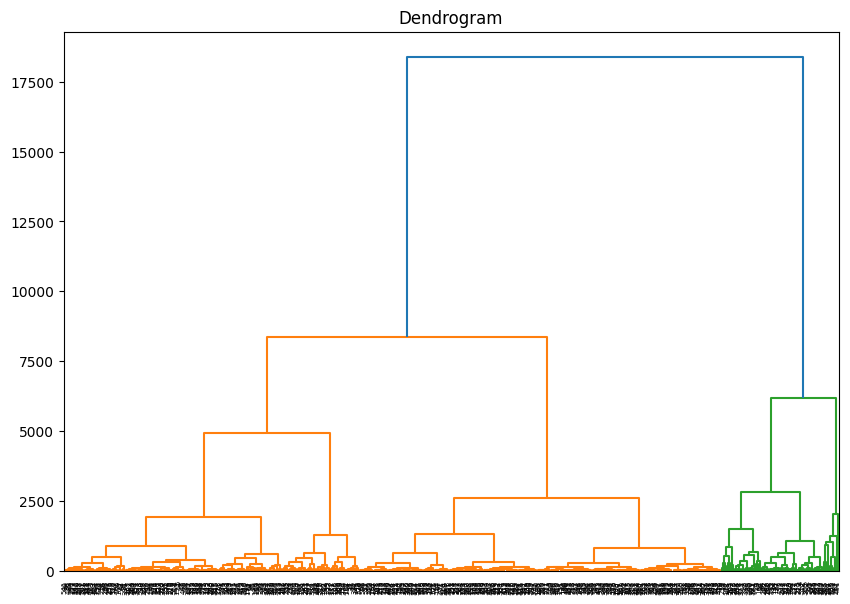

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load breast_cancer dataset
brct = load_breast_cancer()
X = brct.data
y = brct.target

# Simple KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
y_kmeans = kmeans.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X)

# Compare performance using accuracy score
kmeans_score = accuracy_score(y, y_kmeans)
dbscan_score = accuracy_score(y, y_dbscan)
hc_score = accuracy_score(y, y_hc)

print("Accuracy Score - KMeans:", kmeans_score*100)
print("Accuracy Score - DBSCAN:", dbscan_score*100)
print("Accuracy Score - Hierarchical Clustering:", hc_score*100)

# Visualize the clustering
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title("KMeans")

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title("DBSCAN")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='viridis')
plt.title("Hierarchical Clustering")

# plt.show()

linked = linkage(X, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram")
plt.show()

# plt.show()
